In [14]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# read the data
train=pd.read_csv("Global_Landslide_Catalog_Export-Cleansed-New-4Rows.csv")

In [3]:
# checking the percentage of missing values in each variable
train.isnull().sum()/len(train)*100

event_id           0.000000
fatality_count    12.553249
injury_count      51.427536
country_name      14.157527
dtype: float64

In [4]:
# saving missing values in a variable
a = train.isnull().sum()/len(train)*100
# saving column names in a variable
variables = train.columns
variable = [ ]
for i in range(0,4):
    if a[i]<=51:   #setting the threshold as 51%
        variable.append(variables[i])

In [5]:
# checking the percentage of missing values in each variable
train.isnull().sum()/len(train)*100

event_id           0.000000
fatality_count    12.553249
injury_count      51.427536
country_name      14.157527
dtype: float64

In [6]:
train['fatality_count'].fillna(train['fatality_count'].mode()[0], inplace=True)
train['injury_count'].fillna(train['injury_count'].mode()[0], inplace=True)
train['country_name'].fillna(train['country_name'] =='unknown', inplace=True)

In [7]:
train.isnull().sum()/len(train)*100

event_id          0.0
fatality_count    0.0
injury_count      0.0
country_name      0.0
dtype: float64

In [8]:
train.var()

event_id          1.055749e+07
fatality_count    3.137247e+03
injury_count      3.489337e+01
dtype: float64

In [9]:
numeric = train[['country_name','fatality_count','injury_count']]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]>=2:   #setting the threshold as 2%
       variable.append(numeric[i+1])

In [10]:
df=train.drop(columns='event_id', axis=1)
df.corr()

,fatality_count,injury_count
fatality_count,1.000000,0.074488
injury_count,0.074488,1.000000


In [11]:
df

,fatality_count,injury_count,country_name
0,11.0,0.0,China
1,0.0,0.0,United States
2,10.0,0.0,Peru
3,1.0,0.0,Nepal
4,0.0,0.0,Philippines
...,...,...,...
11028,27.0,0.0,False
11029,2.0,0.0,False
11030,1.0,0.0,False
11031,24.0,0.0,False


In [12]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,train.fatality_count)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

# RANDOM FOREST CHART

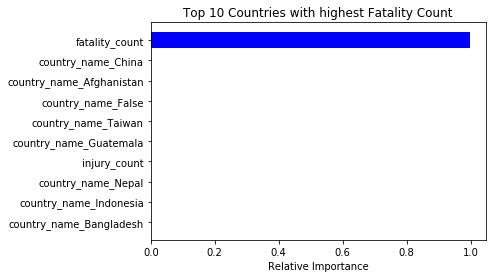

In [13]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Top 10 Countries with highest Fatality Count')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()